# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Very poor service, very fru..."
1,Not Verified | Generally poor. Sent to gate o...
2,Not Verified | BA changed our prepaid seats a...
3,Not Verified | Flew from London Heathrow to M...
4,Not Verified | I was meant to fly in January t...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,"✅ Trip Verified | Very poor service, very fru..."
1,Not Verified | Generally poor. Sent to gate o...
2,Not Verified | BA changed our prepaid seats a...
3,Not Verified | Flew from London Heathrow to M...
4,Not Verified | I was meant to fly in January t...
...,...
995,✅ Trip Verified | Washington to Bucharest ret...
996,✅ Trip Verified | London to Warsaw. BA Europe...
997,✅ Trip Verified | London to Istanbul. Due to ...
998,✅ Trip Verified | London to Cape Town. Flying...


Removing the parts before | in the reviews column

In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,"British Airways is always late, their website..."
1,Flew from Amman to London on Nov. 14 2022. No...
2,This is the worst experience I have ever had ...
3,Flying LHR T5 to CPT November 2022: BA app ...
4,Worst experience ever. Outbound flight was ca...
...,...
995,Very full flight on G-BNLP/B747 flying from M...
996,Warsaw to London. WAW is not a pleasant airpo...
997,"I booked my flight with Cathay Pacific, the..."
998,Flew British Airways from Lisbon to London He...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...
1,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...
2,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...
3,Flew from London Heathrow to Marrakech. BA c...,Flew from London Heathrow to Marrakech BA cha...
4,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


 
```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F..."
1,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ..."
2,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ..."
3,Flew from London Heathrow to Marrakech. BA c...,Flew from London Heathrow to Marrakech BA cha...,"[(Flew, None), (London, n), (Heathrow, n), (Ma..."
4,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F...",poor service frustrating Firstly flight LHR ...
1,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ...",Generally poor Sent gate time sat maybe minu...
2,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...
3,Flew from London Heathrow to Marrakech. BA c...,Flew from London Heathrow to Marrakech BA cha...,"[(Flew, None), (London, n), (Heathrow, n), (Ma...",Flew London Heathrow Marrakech BA change pre...
4,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,...",mean fly January Algeria pay ticket day mean...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"Very poor service, very frustrating. Firstly...",poor service frustrating Firstly flight LHR ...
1,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent gate time sat maybe minu...
2,BA changed our prepaid seats at the last min...,BA change prepaid seat last minute charge us...
3,Flew from London Heathrow to Marrakech. BA c...,Flew London Heathrow Marrakech BA change pre...
4,I was meant to fly in January to Algeria. I p...,mean fly January Algeria pay ticket day mean...
...,...,...
995,Washington to Bucharest return via London. I...,Washington Bucharest return via London origi...
996,London to Warsaw. BA European service is bec...,London Warsaw BA European service become lik...
997,London to Istanbul. Due to poor weather cond...,London Istanbul Due poor weather condition L...
998,London to Cape Town. Flying first class with...,London Cape Town Flying first class British ...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F...",poor service frustrating Firstly flight LHR ...,-0.9403,Negative
1,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ...",Generally poor Sent gate time sat maybe minu...,-0.4588,Negative
2,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...,0.6908,Positive
3,Flew from London Heathrow to Marrakech. BA c...,Flew from London Heathrow to Marrakech BA cha...,"[(Flew, None), (London, n), (Heathrow, n), (Ma...",Flew London Heathrow Marrakech BA change pre...,-0.6162,Negative
4,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,...",mean fly January Algeria pay ticket day mean...,-0.5994,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    527
Negative    367
Neutral     106
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x7fede922d5e0>,
 [Text(-0.0931934888363163, 1.0960451512773166, 'Positive'),
  Text(-0.2702102356991396, -1.0662956571811664, 'Negative'),
  Text(1.275835215204122, -0.44129865583870975, 'Neutral')],
 [Text(-0.05083281209253616, 0.5978428097876272, '52.7%'),
  Text(-0.14738740129043978, -0.5816158130079089, '36.7%'),
  Text(0.80330365401741, -0.27785470923178024, '10.6%')])

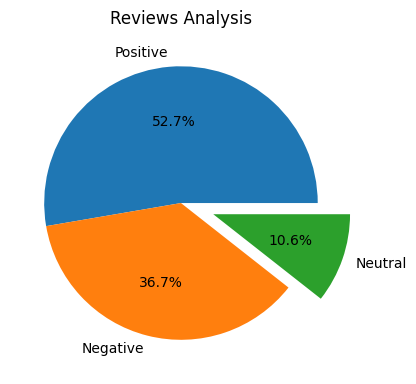

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

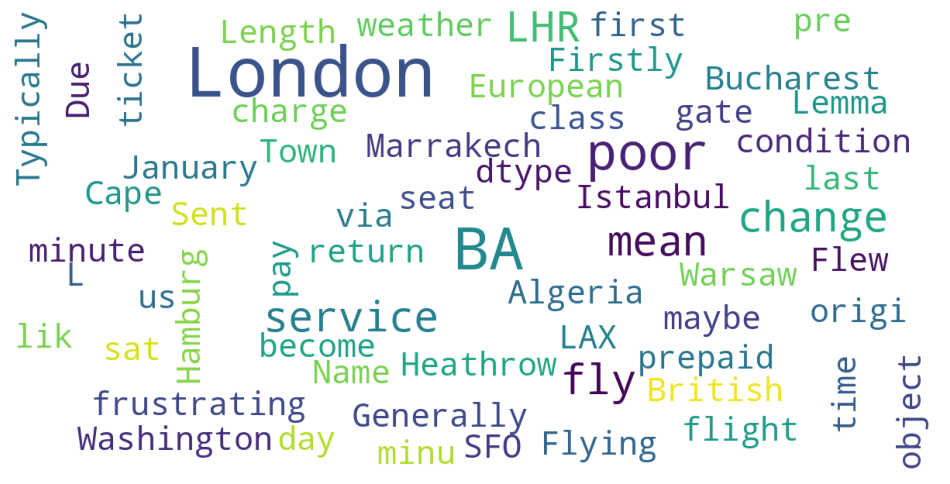

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)